In [1]:
# Data management
import numpy as np
import pandas as pd
import csv
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Web requests
import requests
# Env files import
import os, sys
# Datetime management
from datetime import datetime, timezone, timedelta
# Ignore warnings
from warnings import filterwarnings

filterwarnings('ignore')

## Get weather data from GeoMet

The GeoMet API has a query limit of 500 for the results per request. So we need will make 1 request per year

In [2]:
station_name = "TORONTO CITY"
province_code = "ON"

start_date = datetime.fromisoformat("2020-01-01")
end_date = datetime.fromisoformat("2025-01-01")

responses = []
for year in range(start_date.year, end_date.year+1):
    start = datetime.fromisoformat(f"{year}-01-01")
    end = datetime.fromisoformat(f"{year+1}-01-01")
    if end_date < end:
        end = end_date
    weather_query_url = (
        f"https://api.weather.gc.ca/collections/climate-daily/items"
        f"?STATION_NAME={station_name}"
        # f"?PROVINCE_CODE={province_code}"
        f"&datetime={start}/{end}"
        f"&f=csv"
        # f"&limit=500"
    )

    resp = requests.get(weather_query_url)
    resp.raise_for_status()
    responses.append(resp)

In [3]:
dfs = []
for resp in responses:
    df = pd.read_csv(csv.StringIO(resp.text))
    df.index = df['LOCAL_DATE'].transform(lambda x: pd.to_datetime(x))
    dfs.append(df)

total_df = pd.concat(dfs, join='inner', axis=0, sort=True)
total_df.drop_duplicates(inplace=True)
total_df

,CLIMATE_IDENTIFIER,COOLING_DEGREE_DAYS,COOLING_DEGREE_DAYS_FLAG,DIRECTION_MAX_GUST,DIRECTION_MAX_GUST_FLAG,HEATING_DEGREE_DAYS,HEATING_DEGREE_DAYS_FLAG,ID,LOCAL_DATE,LOCAL_DAY,...,SPEED_MAX_GUST_FLAG,STATION_NAME,TOTAL_PRECIPITATION,TOTAL_PRECIPITATION_FLAG,TOTAL_RAIN,TOTAL_RAIN_FLAG,TOTAL_SNOW,TOTAL_SNOW_FLAG,x,y
LOCAL_DATE,,,,,,,,,,,,,,,,,,,,,
2020-01-06,6158359,0.0,NaN,29.0,NaN,16.8,NaN,6158359.2020.1.6,2020-01-06 00:00:00,6,...,NaN,TORONTO CITY CENTRE,0.0,NaN,NaN,NaN,NaN,NaN,-79.396111,43.627500
2020-01-09,6158359,0.0,NaN,8.0,NaN,21.4,NaN,6158359.2020.1.9,2020-01-09 00:00:00,9,...,NaN,TORONTO CITY CENTRE,0.0,NaN,NaN,NaN,NaN,NaN,-79.396111,43.627500
2020-01-05,6158359,0.0,NaN,21.0,NaN,17.6,NaN,6158359.2020.1.5,2020-01-05 00:00:00,5,...,NaN,TORONTO CITY CENTRE,2.3,NaN,NaN,NaN,NaN,NaN,-79.396111,43.627500
2020-01-07,6158359,0.0,NaN,26.0,NaN,17.8,NaN,6158359.2020.1.7,2020-01-07 00:00:00,7,...,NaN,TORONTO CITY CENTRE,0.0,NaN,NaN,NaN,NaN,NaN,-79.396111,43.627500
2020-01-04,6158359,0.0,NaN,29.0,NaN,15.9,NaN,6158359.2020.1.4,2020-01-04 00:00:00,4,...,NaN,TORONTO CITY CENTRE,1.4,NaN,NaN,NaN,NaN,NaN,-79.396111,43.627500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-28,6158355,0.0,NaN,NaN,M,1.1,NaN,6158355.2024.5.28,2024-05-28 00:00:00,28,...,M,TORONTO CITY,2.9,NaN,NaN,NaN,NaN,NaN,-79.400000,43.666667
2024-05-11,6158355,0.0,NaN,NaN,M,5.6,NaN,6158355.2024.5.11,2024-05-11 00:00:00,11,...,M,TORONTO CITY,1.9,NaN,NaN,NaN,NaN,NaN,-79.400000,43.666667
2024-05-17,6158355,0.0,NaN,NaN,M,0.5,NaN,6158355.2024.5.17,2024-05-17 00:00:00,17,...,M,TORONTO CITY,3.5,NaN,NaN,NaN,NaN,NaN,-79.400000,43.666667


In [4]:
cols = [
    "MIN_TEMPERATURE",
    "MAX_TEMPERATURE",
    "MEAN_TEMPERATURE",
    "COOLING_DEGREE_DAYS",
    "HEATING_DEGREE_DAYS",
    "STATION_NAME",
    ]
weather_data = total_df[cols]
new_cols = [col.lower() for col in weather_data.columns]
weather_data.columns = new_cols
weather_data['weekday'] = weather_data.index.weekday
weather_data.sort_index(ascending=True, inplace=True)
weather_data = weather_data[weather_data['station_name'] == 'TORONTO CITY CENTRE']  # Only keep Toronto city centre since it has daily data instead of bi-daily data
weather_data

,min_temperature,max_temperature,mean_temperature,cooling_degree_days,heating_degree_days,station_name,weekday
LOCAL_DATE,,,,,,,
2020-01-01,-0.8,1.7,0.5,0.0,17.5,TORONTO CITY CENTRE,2
2020-01-02,1.6,4.9,3.3,0.0,14.7,TORONTO CITY CENTRE,3
2020-01-03,3.0,7.2,5.1,0.0,12.9,TORONTO CITY CENTRE,4
2020-01-04,0.3,3.9,2.1,0.0,15.9,TORONTO CITY CENTRE,5
2020-01-05,-0.9,1.7,0.4,0.0,17.6,TORONTO CITY CENTRE,6
...,...,...,...,...,...,...,...
2024-12-28,2.0,7.0,4.5,0.0,13.5,TORONTO CITY CENTRE,5
2024-12-29,0.9,10.0,5.5,0.0,12.5,TORONTO CITY CENTRE,6
2024-12-30,2.7,7.7,5.2,0.0,12.8,TORONTO CITY CENTRE,0


<Axes: xlabel='LOCAL_DATE'>

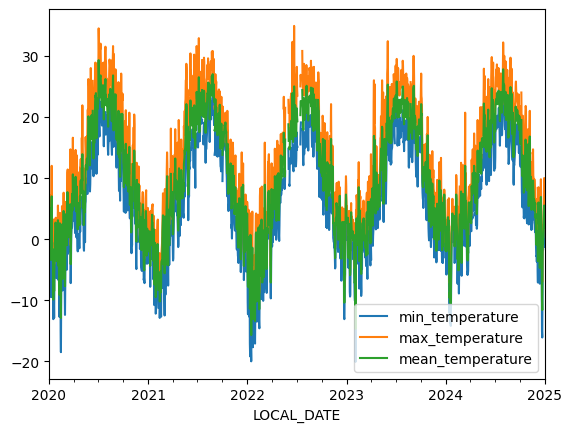

In [5]:
weather_data.plot(y=['min_temperature', 'max_temperature', 'mean_temperature'])

## Get energy price data for Ontario

In [6]:
folder = 'PriceNodal'
base = 'https://reports-public.ieso.ca/public'

start_year = start_date.year
end_year = end_date.year

resps = []

for year in range(start_year, end_year+1):
    fname = f"PUB_PriceNodal_{year}.csv"
    url = f"{base}/{folder}/{fname}"
    resp = requests.get(url)
    resp.raise_for_status()
    print(f"downloaded {fname}")
    resps.append(resp)

downloaded PUB_PriceNodal_2020.csv
downloaded PUB_PriceNodal_2021.csv
downloaded PUB_PriceNodal_2022.csv
downloaded PUB_PriceNodal_2023.csv
downloaded PUB_PriceNodal_2024.csv
downloaded PUB_PriceNodal_2025.csv


Find out which vendor corresponds to Toronto

In [7]:
comments = resps[0].text.split("\n")[:5]
print(comments)

zones = comments[-2].split(',')
vendors = comments[-1].split(',')

toronto_index = zones.index('Toronto')
vendor = vendors[toronto_index]

vendor

['\\\\Hourly Nodal Prices Report,,,,,,,,,,,,,,,,', '\\\\Created at 2021-01-31 08:03:09,,,,,,,,,,,,,,,,', '\\\\For 2020,,,,,,,,,,,,,,,,', 'Zones,,Reference,North West,North West,North West,North East,North East,North East,Ottawa,East,Toronto,Essa,Bruce,South West,Niagara,West', 'Date,Hour,Richview,Atikokan,Pineportage,Thunderbay,Andrews,Canyon,NPIroqfalls,TAOHSC,Saunders,Darlington,Desjoachims,BruceB,GerdauCam,BECK2,Greenfield']


'Darlington'

In [8]:
dfs = []
for resp in resps:
    df = pd.read_csv(csv.StringIO(resp.text), header=4)
    dfs.append(df)

Create hourly price dataframe and clean the data, set the index to datetime

In [9]:
price_data = pd.concat(dfs, axis=0)
# price_data['Date'] = pd.to_datetime(price_data['Date']) 
price_data['datetime'] = 0
for i in range(price_data.shape[0]):
    date = price_data['Date'].iloc[i]
    hour = price_data['Hour'].iloc[i] - 1
    dt = datetime.strptime(f"{date} {hour}:0:0", r"%Y-%m-%d %H:%M:%S")
    price_data['datetime'].iloc[i] = dt

price_data = price_data[['datetime', vendor]]
price_data['datetime'] = pd.to_datetime(price_data['datetime'])
price_data.set_index('datetime', inplace=True)

price_data['date'] = datetime.date(datetime.now())
for i in range(price_data.shape[0]):
    dt = price_data.index[i]
    date = dt.date()
    price_data['date'].iloc[i] = date
price_data.date = price_data.date.astype('datetime64[ns]')
price_data.index.dtype

dtype('<M8[ns]')

<Axes: xlabel='datetime'>

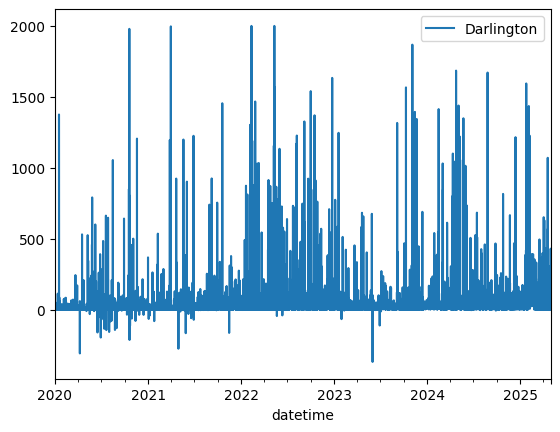

In [11]:
price_data.dropna(axis=1).ffill(axis=0, limit_area='inside').plot(kind='line', y=vendor)

Resample hourly price data to daily OHLC, mean price

In [12]:
def generate_ohlc(price_df: pd.DataFrame, grp_name: str):
    group = price_df.groupby(grp_name)
    open_ = group.first()
    close_ = group.last()
    high_ = group.max()
    low_ = group.min()
    mean_ = group.mean()
    
    resampled_df = pd.concat(
        [open_, close_, high_, low_, mean_],
        join='inner',
        axis=1,
        keys=['open', 'close', 'high', 'low', 'mean'],
        names=['OHLC', 'Vendor']
    )
    return resampled_df.swaplevel(0, 1, axis=1)

price_daily = generate_ohlc(price_df=price_data, grp_name='date').dropna(axis=0)

I don't know why the price goes below 0 sometimes, and why it goes so high sometimes, I should take supply/demand data as well,
they might explain this.

<Axes: xlabel='date'>

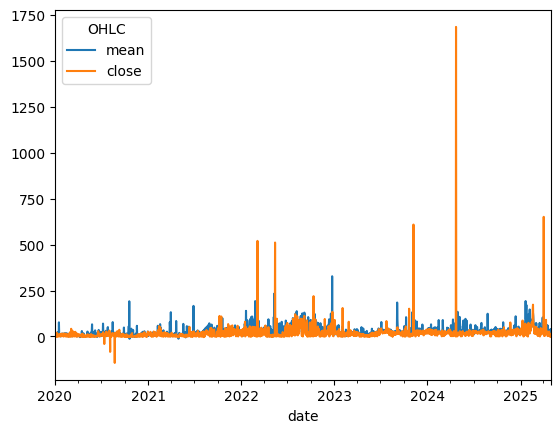

In [13]:
price_daily[vendor].plot(kind='line', y=['mean', 'close'])

In [14]:
data = price_daily[vendor].merge(
    right=weather_data.drop(columns=['station_name']), 
    how='inner', 
    left_index=True, 
    right_index=True)\
        .dropna(axis=0)

In [15]:
data.keys()

Index(['open', 'close', 'high', 'low', 'mean', 'min_temperature',
       'max_temperature', 'mean_temperature', 'cooling_degree_days',
       'heating_degree_days', 'weekday'],
      dtype='object')

In [16]:
hlc = data[['high', 'low', 'close']]

hlc_normalized = (hlc - hlc.mean()) / hlc.std()

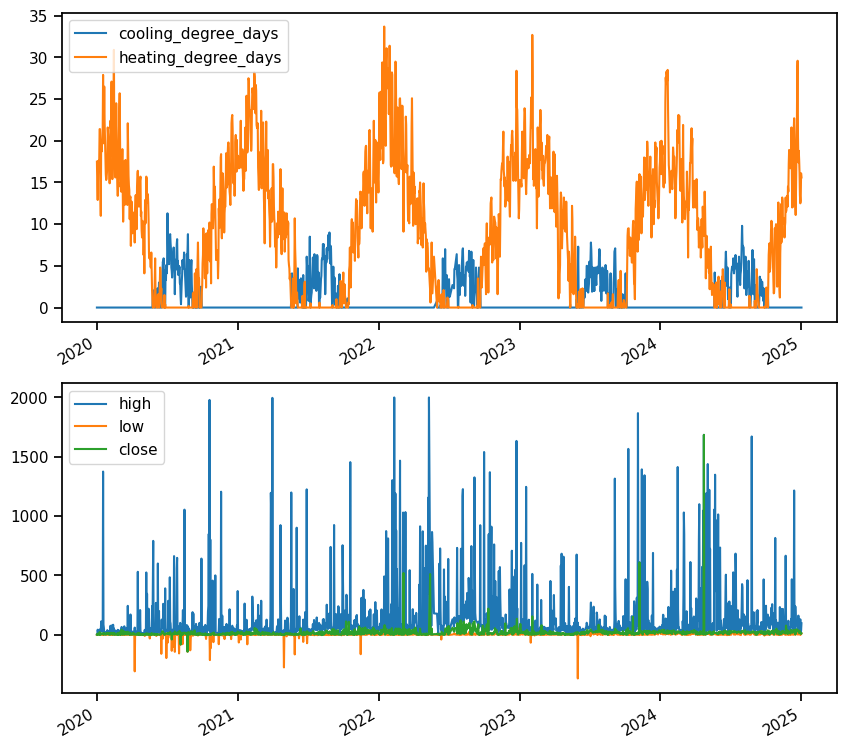

In [17]:
sns.set_context('notebook')
fig = plt.figure(figsize=(10, 10))
ax_weather = fig.add_subplot(211)
ax_price = fig.add_subplot(212)

data.plot(kind='line', y=['cooling_degree_days', 'heating_degree_days'], ax=ax_weather)
hlc.plot(kind='line', ax=ax_price)
plt.show()

In [18]:
corr = data[['mean', 'mean_temperature', 'cooling_degree_days', 'heating_degree_days', 'weekday']]\
    .corr(numeric_only=True)
corr

,mean,mean_temperature,cooling_degree_days,heating_degree_days,weekday
mean,1.000000,0.063028,0.206045,-0.023635,-0.058448
mean_temperature,0.063028,1.000000,0.689830,-0.985221,-0.012952
cooling_degree_days,0.206045,0.689830,1.000000,-0.555629,0.001252
heating_degree_days,-0.023635,-0.985221,-0.555629,1.000000,0.015170
weekday,-0.058448,-0.012952,0.001252,0.015170,1.000000


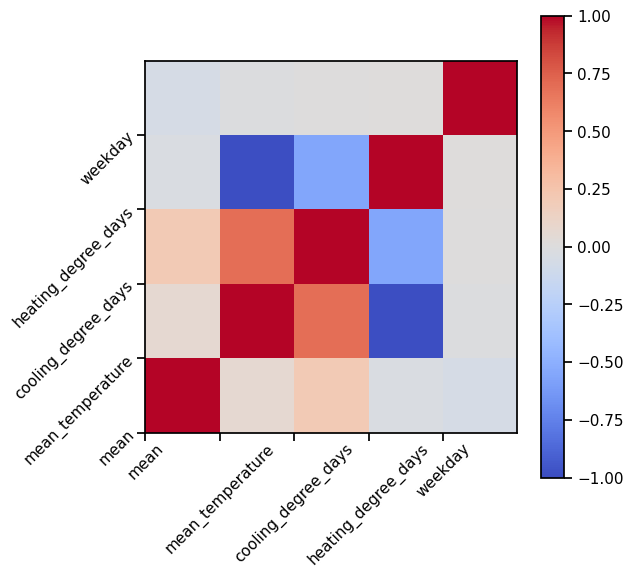

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
patch = plt.pcolormesh(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(patch, ax=ax)
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.tick_params(axis='both', rotation=45, pad=0)

plt.show()

In [20]:
data_norm = (data - data.mean()) / data.std()

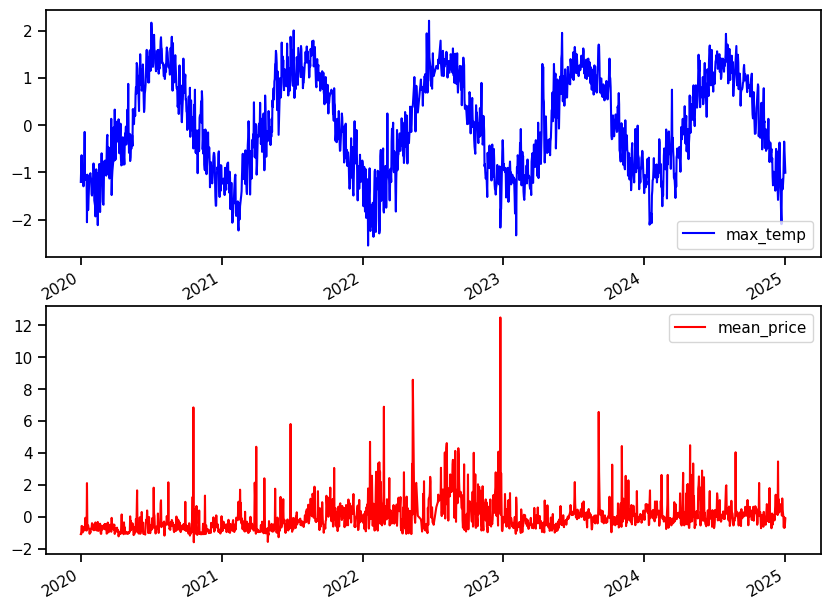

In [21]:
fig = plt.figure(figsize=(10, 8))
gc = fig.add_gridspec(2, 1)
ax1 = fig.add_subplot(gc[0])
ax2 = fig.add_subplot(gc[1])
data_norm.plot(kind='line', y=['max_temperature'], label=['max_temp'], ax=ax1, color='b')
data_norm.plot(kind='line', y='mean', label='mean_price', ax=ax2, color='r')
plt.show()

In [75]:
data[['mean', 'max_temperature', 'min_temperature']].corr(method='pearson')

,mean,max_temperature,min_temperature
mean,1.000000,0.052846,0.073029
max_temperature,0.052846,1.000000,0.952914
min_temperature,0.073029,0.952914,1.000000


## Generating Signals

### Preprocessing

In [30]:
import pandas_ta as ta


data_df = data[['mean', 'min_temperature', 'max_temperature', 
                     'mean_temperature', 'weekday', 
                     'cooling_degree_days', 'heating_degree_days']]

data_df['da_price'] = data_df['mean'].shift(-1) # Create Day Ahead price as label for prediction
data_df['price_sma15'] = data_df.ta.sma(close='mean', length=15)
data_df['temp_sma15'] = data_df.ta.sma(close='mean_temperature', length=15)

data_df.dropna(axis=0, inplace=True)

In [32]:
X = data_df.drop(columns=['mean', 'da_price'])  # Do not include price in features
y = data_df['da_price']     # Predict the Day Ahead price

split_index = int(X.shape[0] * 0.6)

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

### Modeling

#### RidgeCV

In [33]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer, root_mean_squared_error

scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

rcv = RidgeCV(scoring=scorer)
rcv.fit(X_train, y_train)

RidgeCV(scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'))

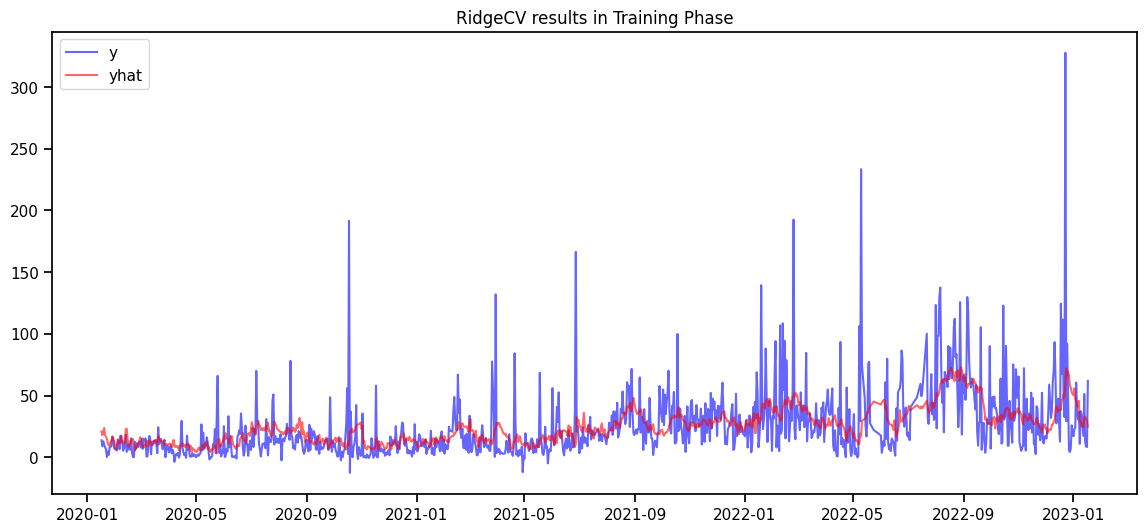

In [34]:
y_hat_train = rcv.predict(X_train)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(y_train.index, y_train.values, 'b-', label='y', alpha=.6)
ax.plot(y_train.index, y_hat_train, 'r-', label='yhat', alpha=.6)
ax.legend(loc='best')

ax.set_title("RidgeCV results in Training Phase")
fig.show()

In [35]:
y_hat = rcv.predict(X_test)

In [36]:
test_loss = root_mean_squared_error(y_test, y_hat)

print(f"Test RMSE ~= {test_loss:.4f}")

Test RMSE ~= 17.2709


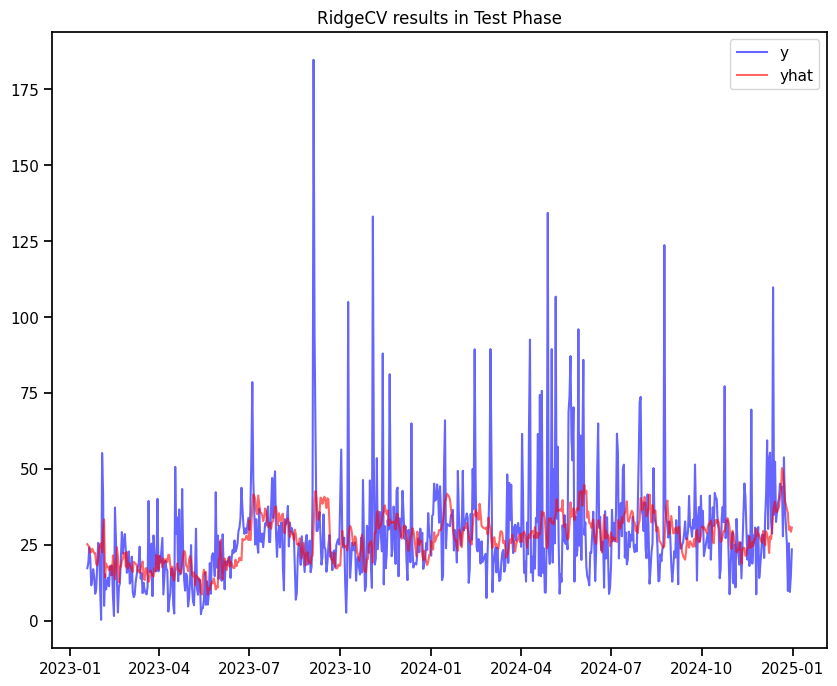

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(y_test.index, y_test.values, 'b-', label='y', alpha=.6)
ax.plot(y_test.index, y_hat, 'r-', label='yhat', alpha=.6)
ax.legend(loc='best')

ax.set_title("RidgeCV results in Test Phase")
fig.show()

In the model presented above, we try to predict the Day Ahead price using the weather data from the current day.